#Data Exploration

**Dataset** : [Toxic Comment Classification ](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data)




## Librerie

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import re
from nltk.corpus import stopwords
import nltk
from matplotlib_venn import venn2
import numpy as np


from nltk.stem.lancaster import LancasterStemmer 
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
drive.mount('/content/drive', force_remount = True)
root_dir = '/content/drive/MyDrive/ProgettoAML/dataset_clean/'
train = pd.read_csv(root_dir+'train_clean.csv')
test = pd.read_csv(root_dir+'test_clean.csv')

Mounted at /content/drive


Esempio di commento 'toxic':

In [ ]:
toxic = train[train['toxic'] == 1]
print(toxic['comment_text'].iloc[1])

Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


Esempio di commento 'severe_toxic':

In [ ]:
severe_toxic = train[train['severe_toxic'] == 1]
print(severe_toxic['comment_text'].iloc[1])

Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!


Esempio di commento 'obscene':

In [ ]:
obscene = train[train['obscene'] == 1]
print(obscene['comment_text'].iloc[1])

You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


Esempio di commento 'threat':

In [ ]:
threat = train[train['threat'] == 1]
print(threat['comment_text'].iloc[1])

I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms


Esempio di commento 'insult':

In [ ]:
insult = train[train['insult'] == 1]
print(insult['comment_text'].iloc[1])

You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


Esempio di commento 'identity hate':

In [ ]:
identity_hate = train[train['identity_hate'] == 1]
print(identity_hate['comment_text'].iloc[1])

A pair of jew-hating weiner nazi schmucks.


Vogliamo contare quanti commenti sono negativi e neutri per ciascuna categoria

In [ ]:
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
neutral = []
offensive = []

for col in label_columns:
  temp_count = train[col].value_counts()
  neutral.append(temp_count[0])
  offensive.append(temp_count[1])
  
  print('-----------------------------')
  print('#', col.upper(), 'COMMENTS',':' , temp_count[1])


-----------------------------
# TOXIC COMMENTS : 15294
-----------------------------
# SEVERE_TOXIC COMMENTS : 1595
-----------------------------
# OBSCENE COMMENTS : 8449
-----------------------------
# THREAT COMMENTS : 478
-----------------------------
# INSULT COMMENTS : 7877
-----------------------------
# IDENTITY_HATE COMMENTS : 1405


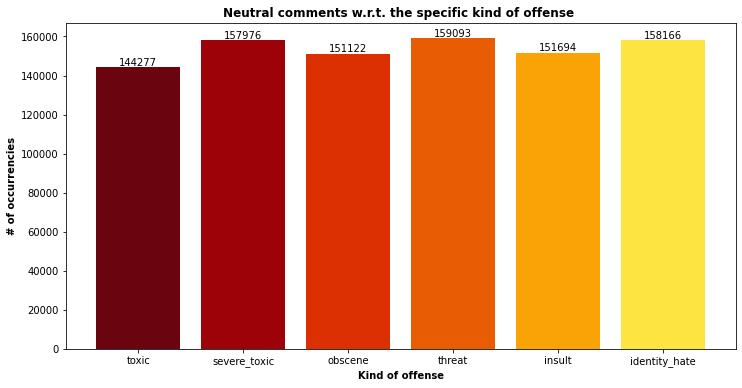

In [ ]:
fig = plt.figure(figsize = (12, 6)) 
plt.bar(label_columns, neutral, color=['#6a040f','#9d0208','#dc2f02','#e85d04','#faa307', '#fee440'])
plt.xlabel('Kind of offense',fontweight ='bold') 
plt.ylabel('# of occurrencies',fontweight ='bold') 
for x,y in zip(label_columns,neutral):
        plt.annotate(y,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,2), 
                     ha='center')                     

plt.title('Neutral comments w.r.t. the specific kind of offense ', fontweight = 'bold') 
plt.show()

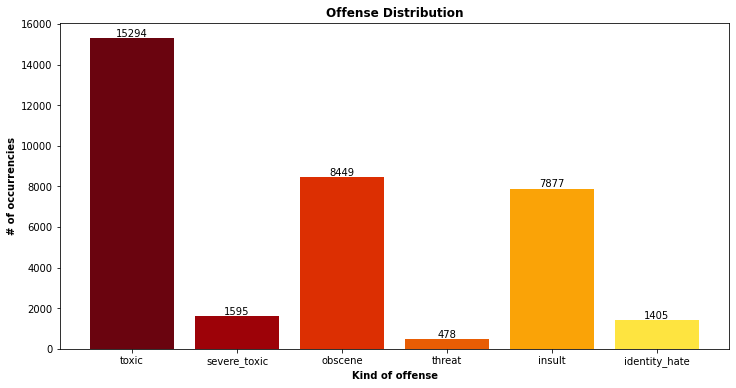

In [ ]:
fig = plt.figure(figsize = (12, 6)) 
plt.bar(label_columns, offensive, color=['#6a040f','#9d0208','#dc2f02','#e85d04','#faa307', '#fee440'])
plt.xlabel('Kind of offense',fontweight ='bold') 
plt.ylabel('# of occurrencies',fontweight ='bold') 

plt.title('Offense Distribution', fontweight = 'bold') 
for x,y in zip(label_columns,offensive):
        plt.annotate(y,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,2), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or c

plt.show()


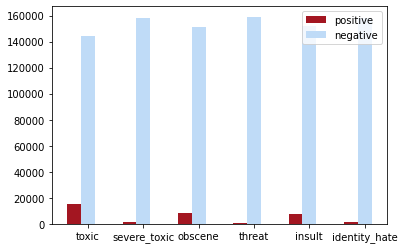

In [ ]:
# Code to draw bar graph for visualising distribution of classes within each label.
barWidth = 0.25

r1 = np.arange(len(label_columns))
r2 = [x + barWidth for x in r1]

plt.bar(r1, offensive, color='#a31621', width=barWidth, label='positive')
plt.bar(r2, neutral, color='#bfdbf7', width=barWidth, label='negative')

# plt.xlabel('Categories', fontweight='bold')

plt.xticks([r + barWidth for r in range(len(label_columns))], label_columns)
plt.legend()
plt.show()

(143346, 9)


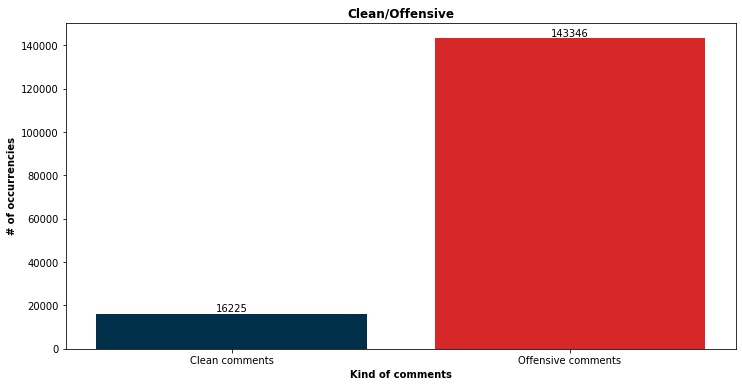

In [ ]:
generic_clean = train[(train['toxic'] == 0) & (train['severe_toxic'] == 0) & 
                               (train['obscene'] == 0) & (train['threat'] == 0) &
                               (train['insult'] == 0) & (train['identity_hate'] == 0)]
print( train[(train['toxic'] == 0) & (train['severe_toxic'] == 0) & 
                               (train['obscene'] == 0) & (train['threat'] == 0) &
                               (train['insult'] == 0) & (train['identity_hate'] == 0)].shape)

comparison = [train.shape[0] - generic_clean.shape[0], generic_clean.shape[0]]
comparison_lables = ['Clean comments', 'Offensive comments']
fig = plt.figure(figsize = (12, 6)) 
plt.bar(comparison_lables, comparison, color=['#003049','#d62828'])
plt.xlabel('Kind of comments',fontweight ='bold') 
plt.ylabel('# of occurrencies',fontweight ='bold') 

plt.title('Clean/Offensive', fontweight = 'bold') 
for x,y in zip(comparison_lables, comparison):
        plt.annotate(y,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,2),
                     ha='center')

plt.show()

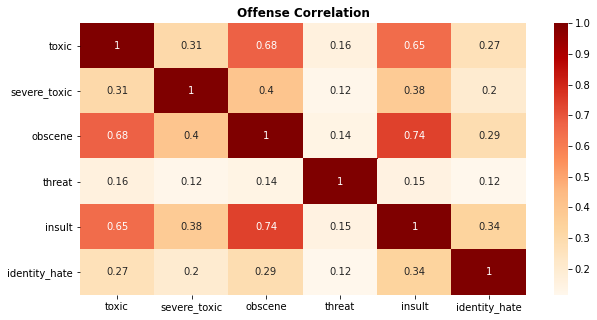

In [ ]:
temp_df=train.iloc[:,2:]
corr=temp_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,
            cmap="OrRd")
plt.title('Offense Correlation', fontweight = 'bold') 
plt.show()

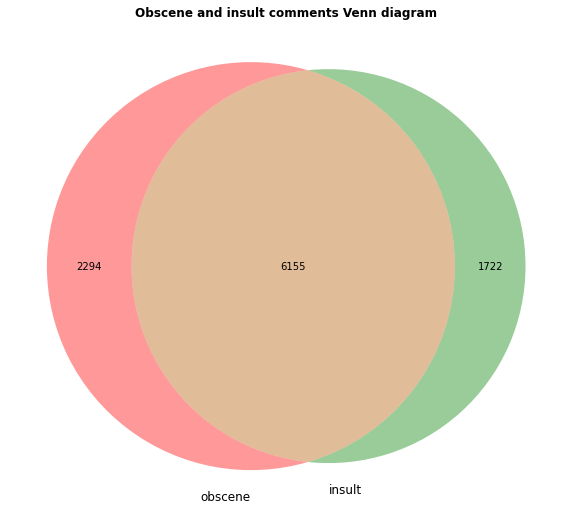

In [ ]:

venn_values = []
venn_values.append(train[(train['obscene']==1) & (train['insult']==0)].shape[0])
venn_values.append(train[(train['obscene']==0) & (train['insult']==1)].shape[0])
venn_values.append(train[(train['obscene']==1) & (train['insult']==1)].shape[0])

plt.figure(figsize=(10, 10))
plt.title("Obscene and insult comments Venn diagram", fontweight = 'bold')
v=venn2(subsets=(venn_values[0],venn_values[1],venn_values[2]), set_labels=('obscene', 'insult'))

plt.show();

# WorldCloud pre processing 


Dopo una prima analisi del dataset siamo andati nel dettaglio ti ogni classe di commento, andando ad individuare quali fossero le parole più usate.

Per fare questo abbiamo dovuto pre processare i commenti per ottenerne ottenere una rappresentazione uniforme. 
Questo attraverso le fasi di:

* Tokenizzazione: suddivide un testo in singole parole, i token, che saranno utilizzati per altri tipi di analisi o attività.
* Standardizzazione: riscrittura delle parole da upper case a lower case.
* Rimozione delle stopwords, parole comuni prive di significato, ma che ricorrono spesso all’interno della frasi.
* Rimozione delle cifre numeriche
* Rimozione della punteggiatura (fase è subentrata all’interno della tokenizzazione).
* Stemming: processo di riduzione delle parole flesse (o talvolta derivate) alla loro forma di origine, base o radice.

In [ ]:
def pre_processing(dataset, stemming=True):
  nltk.download('stopwords')
  df = dataset.copy()
  regex_str = [
      r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
      r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
      r"(?:[a-zA-Z][a-zA-Z-_]+[a-zA-Z])", # words with -
      r"(?:[a-zA-Z][a-zA-Z'])", # words with '
  ]

  WORD = re.compile(r'('+'|'.join(regex_str)+')')
  #WORD = re.compile(r'\w+')

  def regTokenize(text):
      words = WORD.findall(text)
      return words

  #Tokenizzazione
  i = 0
  for x in df["comment_text"]:
      token = regTokenize(x)
      df["comment_text"][i] = token
      i = i+1
  print('TOKENIZATION:\n', df["comment_text"])

  #Da uppercase a lowercase
  df["comment_text"] = df["comment_text"].apply(lambda x: [item.lower() for item in x])
  print('\nLOWER TEXT:\n', df["comment_text"])

  stop = stopwords.words("english")

  #Tolgo le stopwords    
  df["comment_text"]  = df["comment_text"].apply(lambda x: [item for item in x if item not in stop])
  print('\nSTOP WORD REMOVE:\n', df["comment_text"])

  #Tolgo i numeri
  df["comment_text"]  = df["comment_text"].apply(lambda x: [item for item in x if not item.isdigit()]) 

  if stemming:
    lancaster_stemmer = LancasterStemmer()
    df["comment_text_stem"]  = df["comment_text"].apply(lambda x: [lancaster_stemmer.stem(item) for item in x])
    print('\nSTEMMING TEXT:\n', df["comment_text_stem"])

  return df

In [ ]:
train_preprocessed = pre_processing(train)
train_preprocessed.to_csv(r'./drive/MyDrive/ProgettoAML/dataset_preprocessed_wordcloud/train_preprocessed.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TOKENIZATION:
 0         [Explanation, Why, the, edits, made, under, my...
1         [D', aww, He, matches, this, background, colou...
2         [Hey, man, I', really, not, trying, to, edit, ...
3         [More, can, make, any, real, suggestions, on, ...
4         [You, sir, are, my, hero, Any, chance, you, re...
                                ...                        
159566    [And, for, the, second, time, of, asking, when...
159567    [You, should, be, ashamed, of, yourself, That,...
159568    [Spitzer, Umm, theres, no, actual, article, fo...
159569    [And, it, looks, like, it, was, actually, you,...
159570    [And, really, don, think, you, understand, cam...
Name: comment_text, Length: 159571, dtype: object

LOWER TEXT:
 0         [explanation, why, the, edits, made, under, my...
1         [d', aww, he, matches, this, background, colou...
2         [hey, man, i', really, not, trying, to, edit, ...
3         [more, can, make, any, real, suggestions, on, ...
4         [you, sir, 

In [ ]:
test_preprocessed = pre_processing(test)
test_preprocessed.to_csv(r'./drive/MyDrive/ProgettoAML/dataset_preprocessed_wordcloud/test_preprocessed.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TOKENIZATION:
 0        [Thank, you, for, understanding, think, very, ...
1                    [Dear, god, this, site, is, horrible]
2        [Somebody, will, invariably, try, to, add, Rel...
3        [It, says, it, right, there, that, it, IS, typ...
4        [Before, adding, new, product, to, the, list, ...
                               ...                        
63973    [Jerome, see, you, never, got, around, to, thi...
63974    [Lucky, bastard, http://wikimediafoundation.or...
63975    [shame, on, you, all, You, want, to, speak, ab...
63976    [MEL, GIBSON, IS, NAZI, BITCH, WHO, MAKES, SHI...
63977    [Unicorn, lair, discovery, Supposedly, unicorn...
Name: comment_text, Length: 63978, dtype: object

LOWER TEXT:
 0        [thank, you, for, understanding, think, very, ...
1                    [dear, god, this, site, is, horrible]
2        [somebody, will, invariably, try, to, add, rel...
3        [it, says, it, right, there, that, it, is, typ...
4        [before, adding, new, produc

# WordCloud

In [ ]:
import itertools
not_toxic = train_preprocessed[(train_preprocessed['toxic'] == 0) & (train_preprocessed['severe_toxic'] == 0) & 
                               (train_preprocessed['obscene'] == 0) & (train_preprocessed['threat'] == 0) &
                               (train_preprocessed['insult'] == 0) & (train_preprocessed['identity_hate'] == 0)]
toxic = train_preprocessed[train_preprocessed['toxic'] == 1]
severe_toxic = train_preprocessed[train_preprocessed['severe_toxic'] == 1]
obscene = train_preprocessed[train_preprocessed['obscene'] == 1]
threat = train_preprocessed[train_preprocessed['threat'] == 1]
insult = train_preprocessed[train_preprocessed['insult'] == 1]
identity_hate = train_preprocessed[train_preprocessed['identity_hate'] == 1]


sentences_not_toxic = (list(itertools.chain(not_toxic['comment_text_stem'])))
flat_list_not_toxic = [item for sublist in sentences_not_toxic for item in sublist]

sentences_toxic = (list(itertools.chain(toxic['comment_text_stem'])))
flat_list_toxic = [item for sublist in sentences_toxic for item in sublist]

sentences_severe_toxic = (list(itertools.chain(severe_toxic['comment_text_stem'])))
flat_list_severe_toxic = [item for sublist in sentences_severe_toxic for item in sublist]

sentences_obscene = (list(itertools.chain(obscene['comment_text_stem'])))
flat_list_obscene = [item for sublist in sentences_obscene for item in sublist]

sentences_threat = (list(itertools.chain(threat['comment_text_stem'])))
flat_list_threat = [item for sublist in sentences_threat for item in sublist]

sentences_insult = (list(itertools.chain(insult['comment_text_stem'])))
flat_list_insult = [item for sublist in sentences_insult for item in sublist]

sentences_identity_hate = (list(itertools.chain(identity_hate['comment_text_stem'])))
flat_list_identity_hate = [item for sublist in sentences_identity_hate for item in sublist]

**WordCloud Not Toxic**

(-0.5, 399.5, 199.5, -0.5)

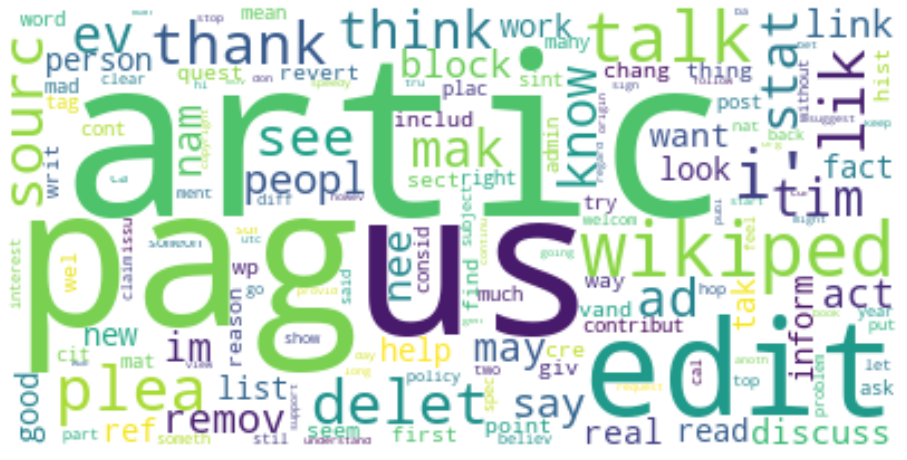

In [ ]:
fig = plt.figure(figsize=(16,10))
wordcloud = WordCloud(background_color='white', max_words=150, max_font_size=100, random_state=4, collocations=False).generate(" ".join(flat_list_not_toxic))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

**WordCloud Toxic**

(-0.5, 399.5, 199.5, -0.5)

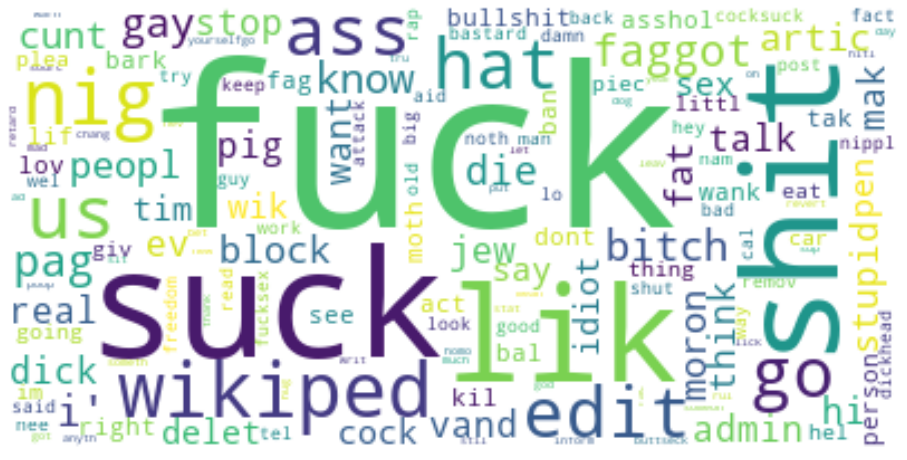

In [ ]:
fig = plt.figure(figsize=(16,10))
wordcloud = WordCloud(background_color='white', max_words=150, max_font_size=100, random_state=4, collocations=False).generate(" ".join(flat_list_toxic))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

**WordCloud Severe Toxic**

(-0.5, 399.5, 199.5, -0.5)

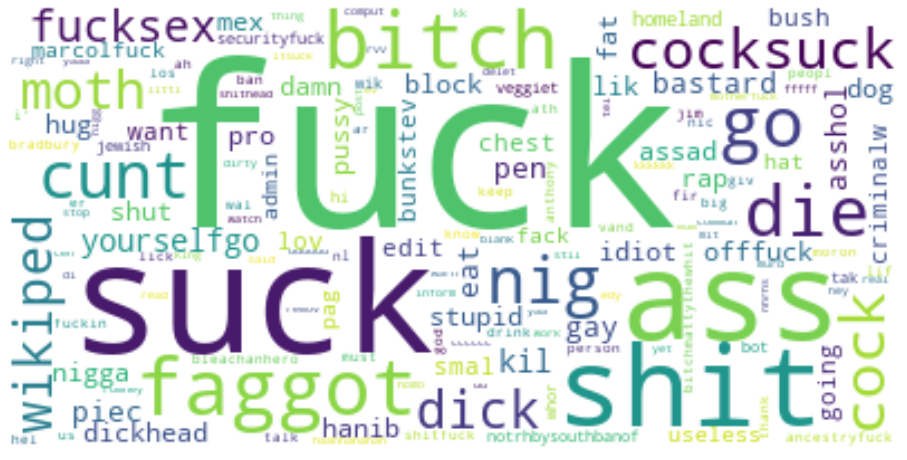

In [ ]:
fig = plt.figure(figsize=(16,10))
wordcloud = WordCloud(background_color='white', max_words=150, max_font_size=100, random_state=4, collocations=False).generate(" ".join(flat_list_severe_toxic))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

**WordCloud Obscene**

(-0.5, 399.5, 199.5, -0.5)

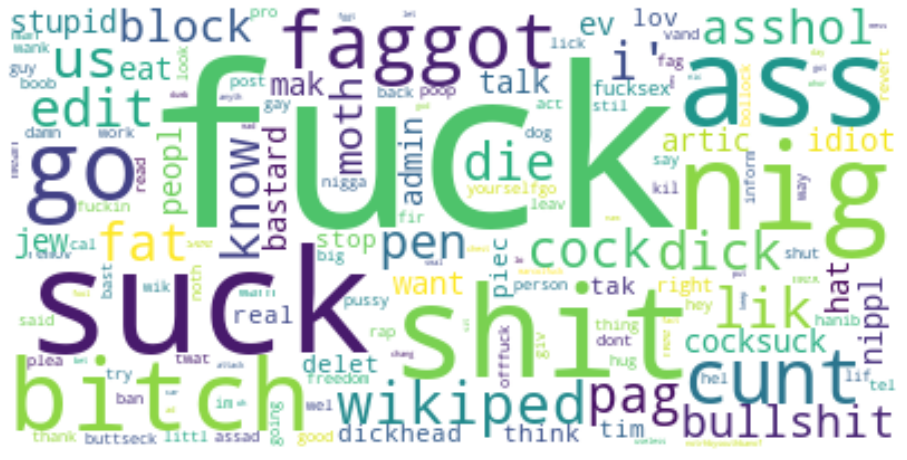

In [ ]:
fig = plt.figure(figsize=(16,10))
wordcloud = WordCloud(background_color='white', max_words=150, max_font_size=100, random_state=4, collocations=False).generate(" ".join(flat_list_obscene))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

**WordCloud Threat**

(-0.5, 399.5, 199.5, -0.5)

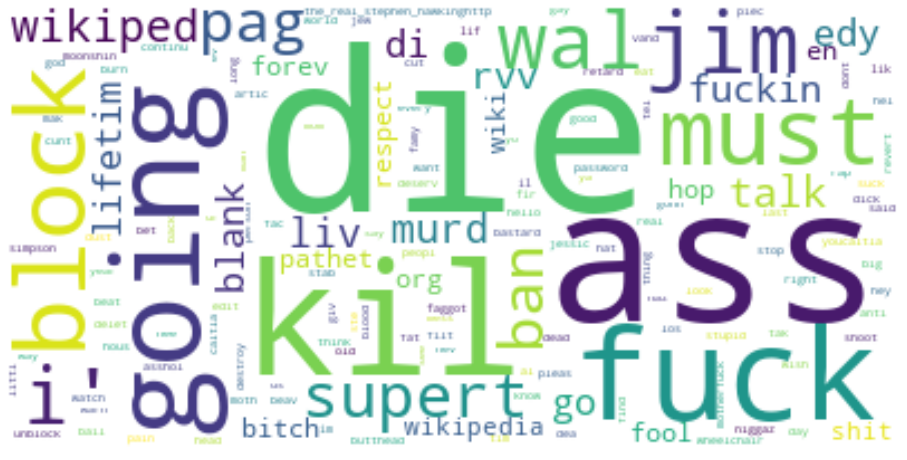

In [ ]:
fig = plt.figure(figsize=(16,10))
wordcloud = WordCloud(background_color='white', max_words=150, max_font_size=100, random_state=4, collocations=False).generate(" ".join(flat_list_threat))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

**WordCloud Insult**

(-0.5, 399.5, 199.5, -0.5)

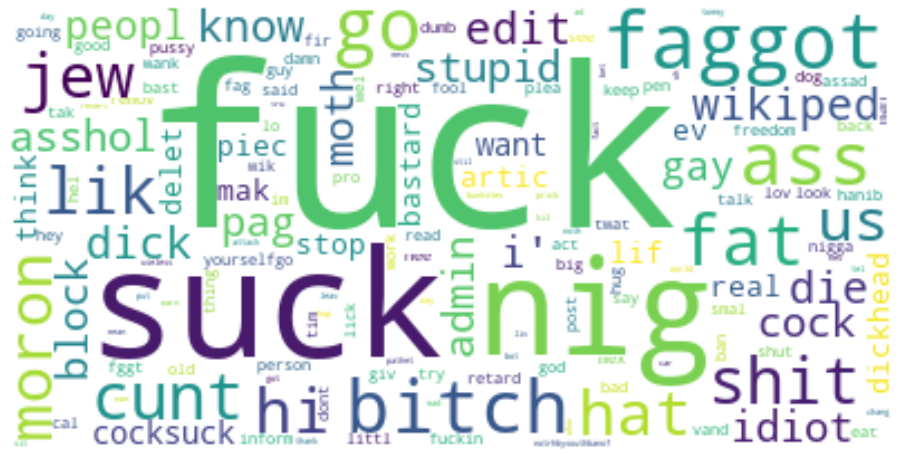

In [ ]:
fig = plt.figure(figsize=(16,10))
wordcloud = WordCloud(background_color='white', max_words=150, max_font_size=100, random_state=4, collocations=False).generate(" ".join(flat_list_insult))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

**WordCloud Identity Hate**

(-0.5, 399.5, 199.5, -0.5)

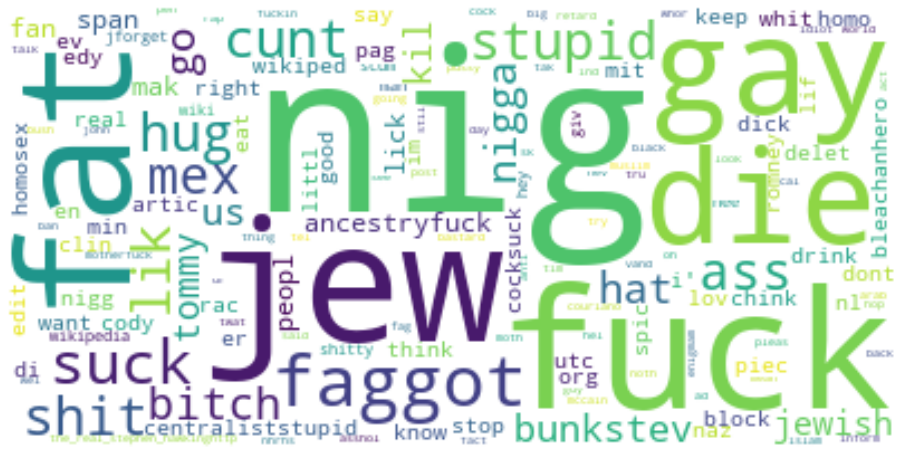

In [ ]:
fig = plt.figure(figsize=(16,10))
wordcloud = WordCloud(background_color='white', max_words=150, max_font_size=100, random_state=4, collocations=False).generate(" ".join(flat_list_identity_hate))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")